# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Sofiyurrohman
- **Email:** ahmadsofi5481@gmail.com
- **ID Dicoding:** itsmrasr

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berdasarkan waktu (tiap jam, harian, atau musiman) dan faktor apa yang paling memengaruhinya?
- Seberapa besar pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pada jam berapa penyewaan sepeda paling sering digunakan, dan bagaimana pola penggunaan di hari kerja dibandingkan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import semua packages/library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [2]:
# mengakses dataset yang ada didalam folder data
days = pd.read_csv("./data/day.csv")
hours = pd.read_csv("./data/hour.csv")

bike_df = {'days': days,
        'hours': hours}

bike_df['days'].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_df['hours'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data bike sharing per hari berhasil dimuat dan ditampilkan 5 baris pertama dari DataFrame tersebut
- Data bike sharing per jam berhasil dimuat dan ditampilkan 5 baris pertama dari DataFrame tersebut
- Kita bisa melihat beberapa kolom yang mungkin bisa jadi gambaran untuk analisis nantinya

### Assessing Data

##### Pemeriksaan tipe data dari tiap kolom yang terdapat dalam data

In [4]:
# pemeriksaan tipe data dari tiap kolom yang terdapat dalam data bike sharing per hari
bike_df['days'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# pemeriksaan tipe data dari tiap kolom yang terdapat dalam data bike sharing per jam
bike_df['hours'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Insight:
- Pada kolom dteday dari dataframe days & hours seharusnya berformat datetime karena isi dari kolom tersebut formatnya datetime
- Pada kolom season, year, month, holiday dan weathersit seharusnya formatnya kategori

##### Pemeriksaan missing value pada data

In [6]:
bike_df['days'].isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike_df['hours'].isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Insight:
- Berdasarkan hasil pemeriksaan missing value, kedua data tidak memiliki nilai yang kosong atau missing value

##### Pemeriksaan data duplikat dan parameter statistik dari kolom numerik dalam kedua data

In [8]:
print('Data Duplikat pada Days: ', bike_df['days'].duplicated().sum())
bike_df['days'].describe()

Data Duplikat pada Days:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Insight:
- Berdasarkan hasil pemeriksaan data duplikat tidak terdapat data yang duplikat atau kembar

In [9]:
print('Data Duplikat pada Hours: ', bike_df['hours'].duplicated().sum())
bike_df['hours'].describe()

Data Duplikat pada Hours:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Insight:
- Berdasarkan hasil pemeriksaan pramater statistik tidak ditemukan value yang janggal

##### Karakteristik Data :
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Cleaning Data

##### Mengubah tipe data pada kolom dteday dari object ke datetime

In [10]:
# mengubah tipe data pada kolom yang perlu diganti
bike_df['days']['dteday'] = pd.to_datetime(bike_df['days']['dteday'])
bike_df['hours']['dteday'] = pd.to_datetime(bike_df['hours']['dteday'])

namaKolom = ['season', 'yr', 'mnth', 'holiday', 'weathersit']
bike_df['days'][namaKolom] = bike_df['days'][namaKolom].astype('category')
bike_df['hours'][namaKolom] = bike_df['days'][namaKolom].astype('category')

In [11]:
# pemeriksaan tipe data apakah sudah berubah ke datetime
print(bike_df['days'].info())
print(bike_df['hours'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

##### Insight:
- Berdasarkan hasil Assessing Data kita perlu merubah tipe data pada kolom dteday dari object ke datetime
- Selain itu juga kita harus merubah beberapa tipe data pada kolom season, yr, mnth, holiday dan weathersit ke category

##### Mengubah judul kolom yang tadinya singkatan agar lebih terbaca

In [12]:
# Mengubah nama judul kolom pada data Days yang tadinya singkatan
bike_df['days'].rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

bike_df['days'].head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# Mengubah nama judul kolom pada data Hours yang tadinya singkatan
bike_df['hours'].rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

bike_df['hours'].head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,2,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,2,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Mereplace isi kolom season, year, month, weekday dan weather_condition yang awalnya angka menjadi teks agar mudah terbaca

In [14]:
bike_df['days']['season'].replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

bike_df['days']['year'].replace((0, 1), ('2011', '2012'), inplace=True)

bike_df['days']['month'].replace(
    (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 
    ('January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'), 
    inplace=True
)

bike_df['days']['weekday'].replace(
    (0, 1, 2, 3, 4, 5, 6), 
    ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), 
    inplace=True
)

bike_df['days']['weather_condition'].replace(
    (1, 2, 3, 4), 
    ('Clear, Partly cloudy', 'Misty clouds', 'Light snow, Light rain', 'Heavy rain, Snow fog'), 
    inplace=True
)


C:\Users\LENOVO THINKPAD T495\AppData\Local\Temp\ipykernel_10976\180014332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_df['days']['season'].replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
C:\Users\LENOVO THINKPAD T495\AppData\Local\Temp\ipykernel_10976\180014332.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, us

In [15]:
bike_df['hours']['season'].replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

bike_df['hours']['year'].replace((0, 1), ('2011', '2012'), inplace=True)

bike_df['hours']['month'].replace(
    (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 
    ('January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'), 
    inplace=True
)

bike_df['hours']['weekday'].replace(
    (0, 1, 2, 3, 4, 5, 6), 
    ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), 
    inplace=True
)

bike_df['hours']['weather_condition'].replace(
    (1, 2, 3, 4), 
    ('Clear, Partly cloudy', 'Misty clouds', 'Light snow, Light rain', 'Heavy rain, Snow fog'), 
    inplace=True
)


C:\Users\LENOVO THINKPAD T495\AppData\Local\Temp\ipykernel_10976\2757851932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_df['hours']['season'].replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
C:\Users\LENOVO THINKPAD T495\AppData\Local\Temp\ipykernel_10976\2757851932.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories,

##### Menghapus kolom diluar dari konteks pertanyaan bisnis

In [16]:
bike_df['days'].drop(columns=['casual', 'registered', 'instant'], inplace=True)
bike_df['days'].head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,count
0,2011-01-01,Spring,2011,January,0,Sunday,0,Misty clouds,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,Spring,2011,January,0,Monday,0,Misty clouds,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,Spring,2011,January,0,Tuesday,1,"Clear, Partly cloudy",0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,Spring,2011,January,0,Wednesday,1,"Clear, Partly cloudy",0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,Spring,2011,January,0,Thursday,1,"Clear, Partly cloudy",0.226957,0.229270,0.436957,0.186900,1600


In [17]:
bike_df['hours'].drop(columns=['casual', 'registered', 'instant'], inplace=True)
bike_df['hours'].head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,count
0,2011-01-01,Spring,2011,January,0,0,Sunday,0,Misty clouds,0.24,0.2879,0.81,0.0,16
1,2011-01-01,Spring,2011,January,1,0,Sunday,0,Misty clouds,0.22,0.2727,0.80,0.0,40
2,2011-01-01,Spring,2011,January,2,0,Sunday,0,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0,32
3,2011-01-01,Spring,2011,January,3,0,Sunday,0,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0,13
4,2011-01-01,Spring,2011,January,4,0,Sunday,0,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0,1


##### Insight:
- Berdasarkan hasil Assessing Data kita perlu merubah tipe data pada kolom dteday dari object ke datetime
- Penyesuaian tipe data pada kolom season, year, month, holiday dan weather condition menjadi category
- Mereplace kolom season, year, month, holiday dan weather condition agar mudah dibaca
- Mengubah judul kolom yang awalnya singkatan menjadi lebih terbaca

## Exploratory Data Analysis (EDA)

### Explore ...

##### Eksplorasi data berdasarkan waktu

Mengelompokan jumlah penyewa per bulan untuk mengetahui berapa jumlah orang yang menyewa sepeda per bulan

In [18]:
bike_df['days'].groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\LENOVO THINKPAD T495\AppData\Local\Temp\ipykernel_10976\829998761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_df['days'].groupby(by='month').agg({


count                           
            max   min         mean     sum
month                                     
January    4521   431  2176.338710  134933
February   5062  1005  2655.298246  151352
March      8362   605  3692.258065  228920
April      7460   795  4484.900000  269094
May        8294  2633  5349.774194  331686
June       8120  3767  5772.366667  346342
July       8173  3285  5563.677419  344948
August     7865  1115  5664.419355  351194
September  8714  1842  5766.516667  345991
October    8156    22  5199.225806  322352
November   6852  1495  4247.183333  254831
December   6606   441  3403.806452  211036

**Insight:**
- Dari hasil pengelompokan diatas, kita mendapatkan bahwa jumlah penyewa dengan nilai rata rata tertinggi berada pada bulan ke 6 atau Juni. Sedangkan untuk jumlah perental dengan nilai rata rata terendah berada pada bulan ke 1 atau Januari.
- Selain itu kita juga dapat mengetahui jumlah penyewa tertinggi yaitu pada bulan ke 9 atau September.

Mengelompokan jumlah penyewa per hari untuk mengetahui berapa jumlah orang yang menyewa sepeda per hari

In [19]:
bike_df['days'].groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
            max   min         mean     sum
weekday                                   
Friday     7804   431  4667.259615  485395
Monday     8227   605  4228.828571  444027
Saturday   8362  1167  4690.288462  487790
Sunday     8714   627  4550.542857  477807
Thursday   8173   441  4548.538462  473048
Tuesday    7525    22  4338.123810  455503
Wednesday  7767   683  4510.663462  469109

**Insight:**
- Berdasarkan hasil pengelompokan diatas rata rata tertinggi penyewa berada pada hari ke 5 atau hari jumat dan paling rendah yaitu hari ke 0 atau hari minggu

Mengelompokan jumlah penyewa pada tiap jam untuk mengetahui berapa jumlah penyewa sepeda dalam setiap jam

In [20]:
bike_df['hours'].groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

**Insight:**
- Berdasarkan hasil pengelompokan diatas dapat kita ketahui para penyewa rata rata tertinggi menyewa pada jam 17 atau jam pulang sekolah ataupun kerja. Dan rata rata terendah pada jam 4 atau dini hari.

##### Eksplorasi data berdasarkan kondisi

Mengelompokan jumlah penyewa berdasarkan musim per hari

In [21]:
bike_df['days'].groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\LENOVO THINKPAD T495\AppData\Local\Temp\ipykernel_10976\995090200.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_df['days'].groupby(by='season').agg({


count                            
         max   min         mean      sum
season                                  
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Fall    8714  1115  5644.303191  1061129
Winter  8555    22  4728.162921   841613

**Insight:**
- Berdasarkan hasil pengelompokan diatas dapat kita ketahui rata rata tertinggi berada pada fall dan yang paling rendah berada pada spring

Mengelompokan jumlah penyewa berdasarkan holiday per hari

In [22]:
bike_df['days'].groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\LENOVO THINKPAD T495\AppData\Local\Temp\ipykernel_10976\376420160.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_df['days'].groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

**Insight:**
- Dari hasil pengelompokan diatas dapat kita ketahui rata rata para penyewa lebih tinggi pada hari biasa bukan hari libur atau holiday

Mengelompokan jumlah penyewa berdasarkan hari kerja per hari

In [23]:
bike_df['days'].groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

**Insight:**
- Dari hasil pengelompokan diatas rata rata penyewa lebih tinggi pada workingday atau hari kerja dibanding bukan hari kerja

#### Eksplorasi korelasi antar faktor yang mempengaruhi tren penyewaan sepeda

Korelasi antar faktor yang mempengaruhi tren penyewaan sepeda pada data Days

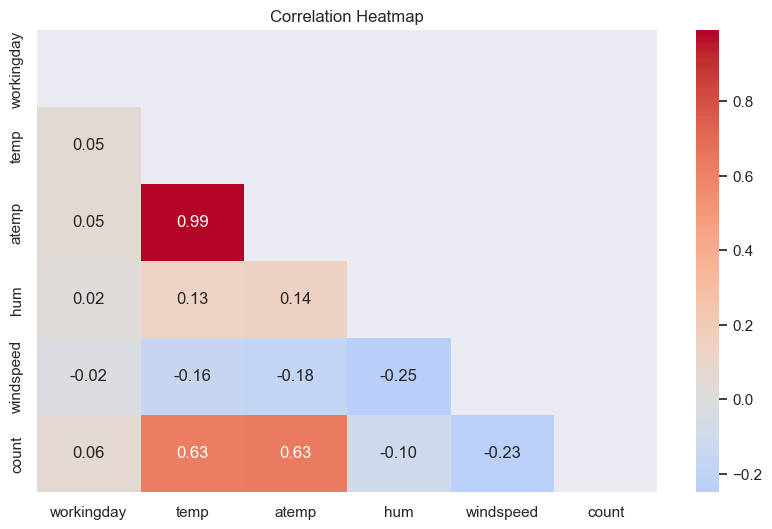

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = bike_df['days'].corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
     

**Insight:**
- Dari hasil heatmap diatas menunjukkan bahwa temp dan atemp hampir identik karena memiliki korelasi yang sangat tinggi (0.99)
- Jumlah penyewaan sepeda berkorelasi positif dengan temp dan atemp (0.63), artinya semakin tinggi suhu maka semakin banyak orang yang menyewa sepeda
- hum memiliki korelasi lemah terhadap jumlah penyewaan seped (-0.10)a, artinya tidak terlalu berpengaruh terhadap jumlah penyewaan sepeda
- windspeed berkorelasi negatif dengan jumlah penyewaan sepeda (0.23), artinya semakin tinggi kecepatan angin, semakin sedikit orang yang menyewa sepeda, mungkin karena bersepeda menjadi lebih sulit atau kurang nyaman.
- weekday tidak memiliki korelasi yang signifikan terhadap jumlah penyewaan sepeda atau relatif stabil antara hari kerja dan akhir pekan

Korelasi antar faktor yang mempengaruhi tren penyewaan sepeda pada data Hours

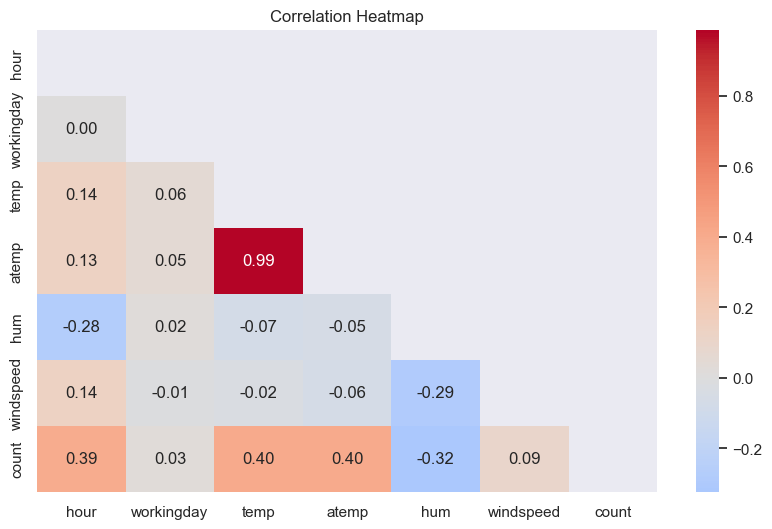

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = bike_df['hours'].corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
     

**Insight:**
- Dari hasil heatmap diatas menunjukkan bahwa temp dan atemp hampir identik karena memiliki korelasi yang sangat tinggi (0.99)
- Jumlah penyewaan sepeda berkorelasi positif dengan temp dan atemp (0.40), artinya semakin tinggi suhu maka semakin banyak orang yang menyewa sepeda
- hum memiliki korelasi lemah terhadap jumlah penyewaan sepeda (-0,32), artinya tidak terlalu berpengaruh terhadap jumlah penyewaan sepeda
- windspeed berkorelasi negatif dengan jumlah penyewaan sepeda (-0,29), artinya semakin tinggi kecepatan angin, semakin sedikit orang yang menyewa sepeda, mungkin karena bersepeda menjadi lebih sulit atau kurang nyaman.
- hour memiliki korelasi positif sedang dengan jumlah penyewaan sepeda (0.39), artinya waktu dalam sehari juga mempengaruhi jumlah peminjaman sepeda
- working day tidak memiliki korelasi yang signifikan (0.03) terhadap jumlah penyewaan sepeda atau relatif stabil antara hari kerja dan akhir pekan

## Visualization & Explanatory Analysis

#### Pertanyaan 1: Bagaimana tren penyewaan sepeda berdasarkan waktu dan faktor apa yang paling memengaruhinya?

Visualisasi tren penyewaan sepeda selama 2 tahun

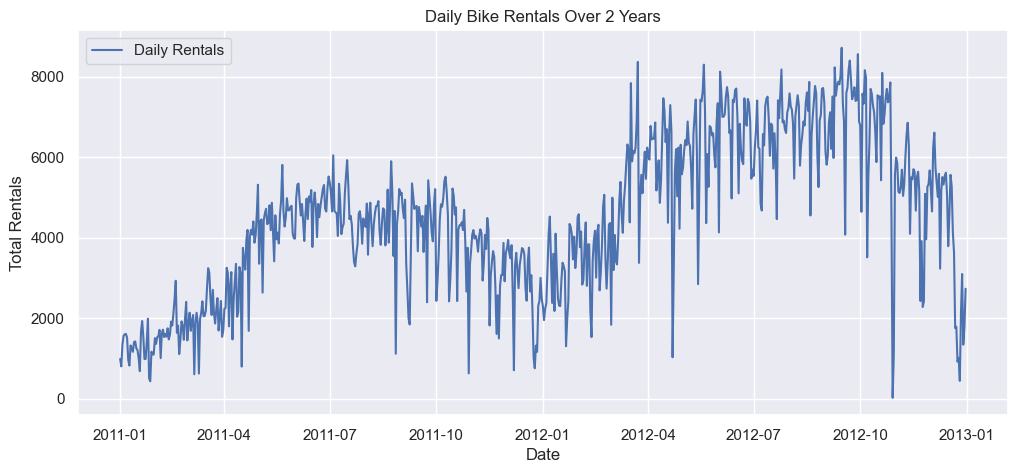

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(bike_df['days']['dateday'], bike_df['days']['count'], label='Daily Rentals', color='b')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.title('Daily Bike Rentals Over 2 Years')
plt.legend()
plt.grid()
plt.show()

Visualisasi tren penyewaan sepeda harian

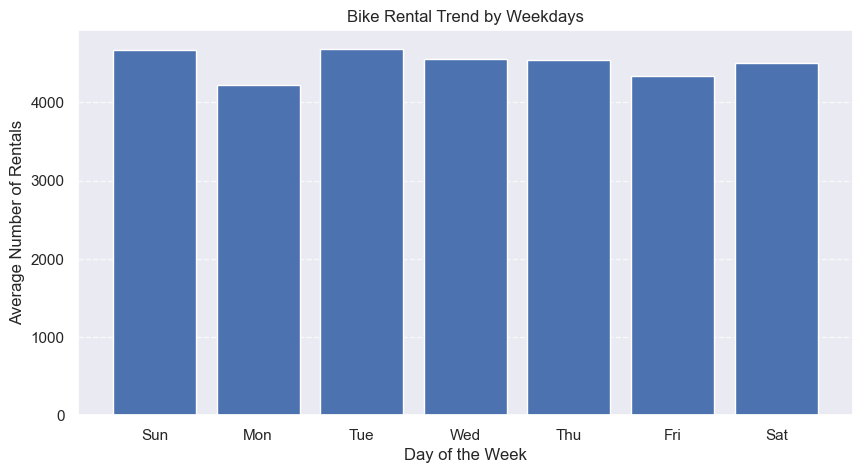

In [27]:
weekday_rentals = bike_df['days'].groupby('weekday')['count'].mean()

plt.figure(figsize=(10, 5))
plt.bar(weekday_rentals.index, weekday_rentals.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Rentals')
plt.title('Bike Rental Trend by Weekdays')
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])  # Ubah indeks ke nama hari
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Visualisasi tren penyewaan sepeda per jam

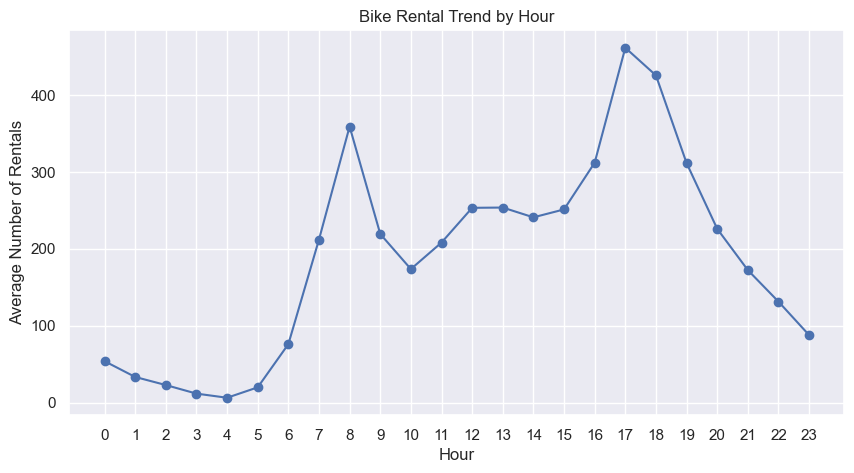

In [28]:
hourly_rentals = bike_df['hours'].groupby('hour')['count'].mean()
peak_hour = hourly_rentals.idxmax()

plt.figure(figsize=(10, 5))
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Average Number of Rentals')
plt.title('Bike Rental Trend by Hour')
plt.xticks(ticks=range(24))
plt.grid()
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi tren penyewaan sepeda dalam rentang waktu dua tahun menunjukkan bahwa tren penyewaan sepeda tertinggi terjadi pada tahun 2012 sekitar bulan agustus atau september. Dan pada awal tahun 2013 mengalami penurunan tetapi secara bertahap meningkat kembali.
- Lalu pada hasil visualisasi tren penyewaan sepeda harian kita dapat simpulkan bahwa hari minggu adalah hari dengan jumlah penyewaan sepeda tertinggi, dan terendah berada pada hari selasa
- Dan pada hasil visualisasi tren penyewaan sepeda per jam dapat kita lihat tren penyewaan sepeda paling banyak berada pada jam 17/18 mungkin pada jam tersebut banyak pekerja yang baru pulang atau berganti shift, dan paling rendah berada pada pukul 4 dini hari.
- Berdasarkan hasil visualisasi korelasi antar kolom dapat kita simpulkan bahwa suhu merupakan faktor utama yang mempengaruhi jumlah penyewaan sepeda, kecepatan angin memiliki pengaruh negatif terhadap penyewaan sepeda meskipn tidak signifikan, dan kelembapan tidak memiliki dampak ynag besar terhadap jumlah penyewaan sepeda. Secara keseluruhan kondisi cuaca yang lebih hangat dan minim angin cenderung meningkatkan jumlah penyewaan sepeda

#### Pertanyaan 2: Seberapa besar pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

Visualisasi korelasi kondisi cuaca terhadap penyewaan sepeda

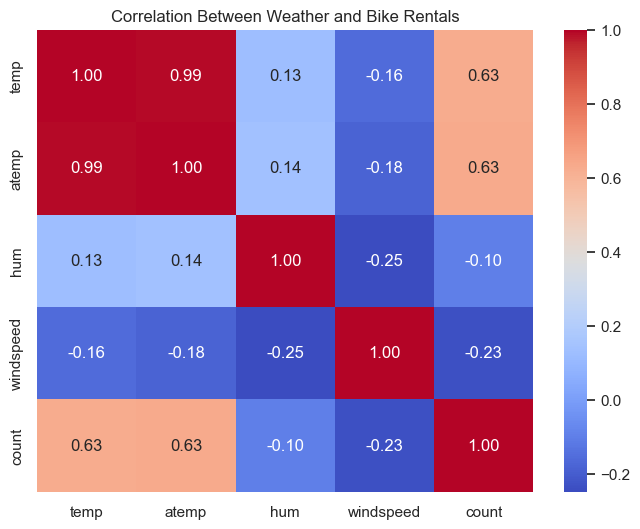

In [29]:
correlation_matrix = bike_df['days'][['temp', 'atemp', 'hum', 'windspeed', 'count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Weather and Bike Rentals')
plt.show()

**Insight:**
- Berdasarkan hasil visualisasi korelasi antar kolom dapat kita simpulkan bahwa suhu merupakan faktor utama yang mempengaruhi jumlah penyewaan sepeda, kecepatan angin memiliki pengaruh negatif terhadap penyewaan sepeda meskipn tidak signifikan, dan kelembapan tidak memiliki dampak ynag besar terhadap jumlah penyewaan sepeda. Secara keseluruhan kondisi cuaca yang lebih hangat dan minim angin cenderung meningkatkan jumlah penyewaan sepeda

## Analisis Lanjutan (Opsional)

Visualisasi analisis jam dengan penyewaan terbanyak

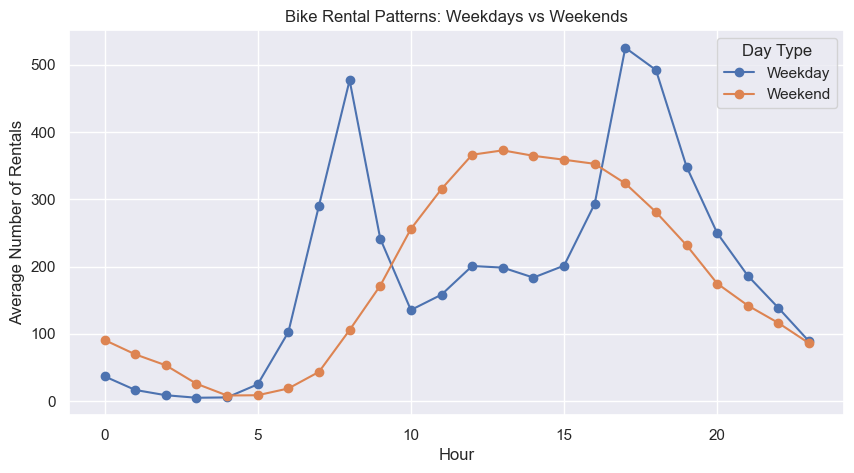

In [30]:
bike_df['hours']['day_type'] = bike_df['hours']['workingday'].map({1: 'Weekday', 0: 'Weekend'})
usage_by_day = bike_df['hours'].groupby(['hour', 'day_type'])['count'].mean().unstack()

plt.figure(figsize=(10, 5))
usage_by_day.plot(kind='line', marker='o', ax=plt.gca())
plt.xlabel('Hour')
plt.ylabel('Average Number of Rentals')
plt.title('Bike Rental Patterns: Weekdays vs Weekends')
plt.legend(title='Day Type')
plt.grid()
plt.show()

**Insight:**
- Penyewaan sepeda pada weekday cenderung terkait dengan mobilitas kerja/sekolah dengan pola jam sibuk di pagi dan sore hari.
- Penyewaan pada weekend lebih santai dan merata sepanjang hari, dengan puncak di tengah hari hingga sore untuk keperluan rekreasi.

## Conclusion

- Conclution pertanyaan 1 :
  Berdasarkan hasil visualisasi tren penyewaan sepeda, dapat disimpulkan bahwa puncak penyewaan terjadi pada bulan Agustus-September 2012, kemudian mengalami penurunan di awal 2013 sebelum meningkat kembali secara bertahap. Dari segi pola harian, hari Minggu menjadi hari dengan jumlah penyewaan tertinggi, sedangkan hari Selasa memiliki jumlah penyewaan terendah.
- Conclution pertanyaan 2
  Dari pola penyewaan per jam, tren tertinggi terjadi pada pukul 17.00-18.00, kemungkinan besar bertepatan dengan jam pulang kerja atau pergantian shift. Sebaliknya, jumlah penyewaan terendah terjadi pada pukul 04.00 dini hari ketika aktivitas luar ruangan masih minim. Selain itu, pola penyewaan pada hari kerja lebih terkait dengan mobilitas kerja dan sekolah, dengan puncak di pagi dan sore hari, sementara pada akhir pekan penyewaan lebih merata sepanjang hari, dengan puncak pada siang hingga sore untuk keperluan rekreasi.
- Conclution pertanyaan 3
  Faktor cuaca juga berperan penting dalam tren penyewaan sepeda. Suhu menjadi faktor utama yang mempengaruhi jumlah penyewaan, di mana kondisi yang lebih hangat meningkatkan minat pengguna. Kecepatan angin memiliki pengaruh negatif meskipun tidak signifikan, sedangkan kelembapan tidak memberikan dampak besar. Secara keseluruhan, kondisi cuaca yang lebih hangat dan minim angin cenderung meningkatkan jumlah penyewaan sepeda.